<a href="https://colab.research.google.com/github/AzadehZahedi/Data-Analysis/blob/main/Electricity_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electricity Consumption Analysis – National Energy Dataset (Iran)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data
df = pd.read_excel('Report.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   #                                             5853 non-null   int64  
 1   تاریخ                                         5853 non-null   object 
 2   زمان                                          5853 non-null   object 
 3   نیاز مصرف برق در پیک                          5819 non-null   float64
 4   نیاز مصرف برق در پیک (سال گذشته)              5056 non-null   float64
 5   ذخیره نیروگاه ها                              5853 non-null   object 
 6   مصرف برق صنایع                                5853 non-null   object 
 7   تولید نیروگاه های تجدید پذیر (مجموع 24 ساعت)  5853 non-null   int64  
 8   میانگین فرکانس                                5853 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 411.7+ KB


گزارش وضعیت شبکه برق کشور در شرکت مدیریت شبکه برق کشور، داده‌های زیر را در قالب یک جدول به صورت روزانه گزارش می‌دهد

در این جدول مصرف برق در هر ‌شبانه‌روز در دو زمان در ردیف‌ های جدول ثبت شده است

مشاهده اول مربوط به زمان اوج مصرف در طول روز (پیک روز) و مشاهده دوم مربوط به اوج مصرف در طول شب (پیک شب) است

داده‌هایی که در هر مشاهده در جدول آمده ناظر به لحظه (واحد زمان) است به همین دلیل مربوط به «توان» است و با واحد «مگاوات» سنجیده می‌شود

توصیفی از هر یک از ستون‌های جدول


p:
نیاز مصرف در پیک = مقدار مصرف در لحظه پیک

p_lastyear:
نیاز مصرف در پیک در سال گذشته = نیاز مصرف در زمان مشابه در سال قبل

p_reserve:
ذخیره نیروگاه‌ها = برای اطمینان از پوشش نیازِ مصرف کشور و تامین فرکانس مطلوب تولید همیشه اندکی بیشتر از پیش‌بینیِ مصرف برنامه‌ریزی می‌شود. از این مقدارِ مازاد که غالباً به صورت سوخت در نیروگاه‌های حرارتی کنار گذاشته می‌شود با عنوان ذخیره نیروگاه‌ها یاد می‌شود
 = تفاضل توان قابل تولید و توان تولید شده در لحظۀ پیک

p_industries:
مصرف برق صنایع = بخشی از برق که به صورت اختصاصی یا اشکال دیگر برای صنایع تولید می‌شود

p_renewable:
تولید نیروگاه‌های تجدیدپذیر= مقدار تولید در نیروگاه‌های برق‌آبی (سدها)، بادی و خورشیدی

freq_avg:
میانگین فرکانس = ایران مانند کشورهای آسیا، آفریقا، اروپا و آمریکای جنوبی از استاندارد ولتاژ 220 و فرکانس 50 هرتز استفاده می‌کند. میانگین فرکانسی که در جدول ثبت می‌شود مقداری است که در آن لحظه محقق شده است

In [ ]:
# rename the columns
df.rename(columns={'#': 'r', 'تاریخ': 'date', 'زمان': 'time', 'نیاز مصرف برق در پیک': 'p', 'نیاز مصرف برق در پیک (سال گذشته)': 'p_lastyear',
                    'ذخیره نیروگاه ها': 'p_reserve', 'مصرف برق صنایع': 'p_industries', 'تولید نیروگاه های تجدید پذیر (مجموع 24 ساعت)': 'p_renewable',
                      'میانگین فرکانس': 'freq_avg'}, inplace=True)

In [ ]:
# change the type of two columns
df['p_reserve'] = df['p_reserve'].str.replace(',', '').astype(int)
df['p_industries'] = df['p_industries'].str.replace(',', '').astype(int)

In [ ]:
# define new columns based on date
df['year'] = df.date.str[:4].astype(int)
df['month'] = df.date.str[5:7].astype(int)
df['day'] = df.date.str[8:10].astype(int)
df['n_days'] = df.day + np.where(df.month > 6, ((df.month)-1) * 30 + 6, ((df.month)-1) * 31) # number of day over a year
df['date_num'] = df['year'] + df['n_days'] / 366.1 # number of days in the year as a decimal

In [ ]:
df.head()

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,year,month,day,n_days,date_num
0,1,1404/01/27,19:47,50290.0,45281.0,946,7770,8090,49.88,1404,1,27,27,1404.073750
1,2,1404/01/27,12:55,49226.0,44808.0,526,7892,8090,49.88,1404,1,27,27,1404.073750
2,3,1404/01/26,19:41,51158.0,46552.0,296,7536,9108,49.87,1404,1,26,26,1404.071019
3,4,1404/01/26,12:30,49748.0,44532.0,337,6828,9108,49.87,1404,1,26,26,1404.071019
4,5,1404/01/25,19:28,51302.0,46361.0,291,7517,8342,49.89,1404,1,25,25,1404.068287


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   r             5853 non-null   int64  
 1   date          5853 non-null   object 
 2   time          5853 non-null   object 
 3   p             5819 non-null   float64
 4   p_lastyear    5056 non-null   float64
 5   p_reserve     5853 non-null   int64  
 6   p_industries  5853 non-null   int64  
 7   p_renewable   5853 non-null   int64  
 8   freq_avg      5853 non-null   float64
 9   year          5853 non-null   int64  
 10  month         5853 non-null   int64  
 11  day           5853 non-null   int64  
 12  n_days        5853 non-null   int64  
 13  date_num      5853 non-null   float64
dtypes: float64(4), int64(8), object(2)
memory usage: 640.3+ KB


In [ ]:
# missing values in each column
df.isnull().sum()

,0
r,0
date,0
time,0
p,34
p_lastyear,797
p_reserve,0
p_industries,0
p_renewable,0
freq_avg,0
year,0


In [ ]:
# percentage of missing values in each column
df.isnull().sum() / len(df) * 100

,0
r,0.000000
date,0.000000
time,0.000000
p,0.580899
p_lastyear,13.616949
p_reserve,0.000000
p_industries,0.000000
p_renewable,0.000000
freq_avg,0.000000
year,0.000000


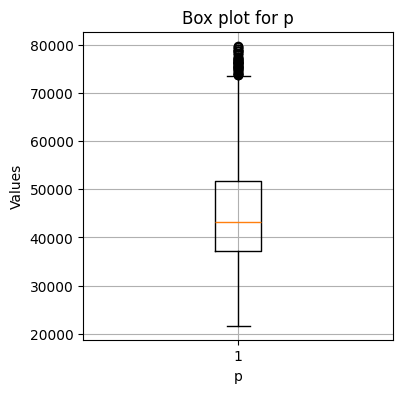

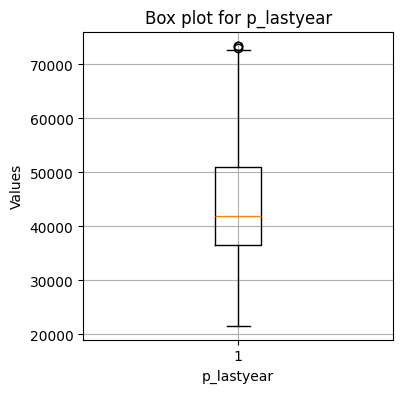

In [ ]:
# handeling the missing values

# outliers deduction for these two columns
columns_with_nan = ['p', 'p_lastyear']
for col in columns_with_nan:
  Q1, Q2, Q3 = df[col].quantile([0.25, 0.5, 0.75])
  IQR = Q3 - Q1

  plt.figure(figsize=(4,4))
  plt.boxplot(df[col].dropna())
  plt.title(f'Box plot for {col}')
  plt.xlabel(col)
  plt.ylabel('Values')
  plt.grid(True)  # نمایش گرید برای بهتر شدن مشاهده نقاط
  plt.show()

In [ ]:
df.groupby(['year', 'month'])['p'].median().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26113.0
1396,30061.5,38495.0,46223.0,49863.0,52163.5,49008.5,37791.5,33977.0,33472.5,32901.0,33547.0,32948.5
1397,33177.0,37279.0,44368.0,53433.0,52611.0,47277.0,39676.0,32247.5,32032.0,33032.0,32513.5,33246.5
1398,30543.5,38695.0,47371.0,53893.5,53006.0,49243.5,42638.0,34528.0,34418.0,35294.0,35619.5,35165.0
1399,31271.0,39407.0,51442.0,55404.5,55968.5,51445.5,43097.5,37150.0,37544.0,38066.0,38178.5,37998.0
1400,38105.0,46412.5,55244.0,60805.5,60398.0,56778.5,44407.0,39712.0,38911.5,38954.5,39467.0,39878.0
1401,41087.0,44383.0,54813.5,62726.0,63747.0,57196.0,48940.0,42256.0,40590.5,41223.0,41657.0,41091.0
1402,39167.0,48185.0,59333.0,65639.0,68174.5,63500.0,51057.0,43918.0,41941.5,42768.0,42908.0,43095.5
1403,40923.0,48361.5,61924.0,70613.0,74294.0,66946.5,53397.0,45867.5,44184.5,44414.0,44358.5,44704.0


In [ ]:
df.groupby(['year', 'month'])['p_lastyear'].median().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,30303.0,38554.0,46223.0,49863.0,52157.0,49008.5,37720.0,33977.0,33444.0,32891.0,33547.0,32948.5
1398,33177.0,37268.0,44368.0,53433.0,52552.0,47277.0,39676.0,32248.0,32032.0,33032.0,32513.5,33290.0
1399,30639.0,38563.0,47468.0,53893.5,53006.0,49243.5,42638.0,34528.0,34418.0,35294.0,35619.5,35165.0
1400,31271.0,39407.0,51442.0,55404.5,55968.5,51445.5,41734.0,37150.0,37544.0,38066.0,38178.5,38067.5
1401,38105.0,46412.5,55244.0,60805.5,60398.0,56778.5,44407.0,39712.0,38911.5,38954.5,39467.0,39878.0
1402,41087.0,44383.0,54813.5,62734.5,63747.0,57196.0,48940.0,42256.0,40590.5,41223.0,41657.0,41091.0
1403,39167.0,48185.0,59333.0,65639.0,68174.5,63500.0,51057.0,43918.0,41941.5,42768.0,42908.0,43095.5


In [ ]:
for col in columns_with_nan:
  df[col] = df.groupby(['year', 'month'])[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.isnull().sum()

,0
r,0
date,0
time,0
p,0
p_lastyear,724
p_reserve,0
p_industries,0
p_renewable,0
freq_avg,0
year,0


In [ ]:
# remove the data before 1397 and after 1403 sine we do not have enouph info
df = df[(df.year >= 1397) & (df.year <= 1403)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5075 entries, 54 to 5128
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   r             5075 non-null   int64  
 1   date          5075 non-null   object 
 2   time          5075 non-null   object 
 3   p             5075 non-null   float64
 4   p_lastyear    5075 non-null   float64
 5   p_reserve     5075 non-null   int64  
 6   p_industries  5075 non-null   int64  
 7   p_renewable   5075 non-null   int64  
 8   freq_avg      5075 non-null   float64
 9   year          5075 non-null   int64  
 10  month         5075 non-null   int64  
 11  day           5075 non-null   int64  
 12  n_days        5075 non-null   int64  
 13  date_num      5075 non-null   float64
dtypes: float64(4), int64(8), object(2)
memory usage: 594.7+ KB


In [ ]:
df.isnull().sum()

,0
r,0
date,0
time,0
p,0
p_lastyear,0
p_reserve,0
p_industries,0
p_renewable,0
freq_avg,0
year,0


In [ ]:
df['p_others'] = df['p'] - df['p_industries']

In [ ]:
# Industry consumption share
df['p_industries_share'] = (df['p_industries'] / df['p']) * 100

In [ ]:
# others consumption share
df['p_others_share'] = (df['p_others'] / df['p']) * 100

In [ ]:
# renewable produce share
df['p_renewable_share'] = (df['p_renewable'] / df['p']) * 100

In [ ]:
df

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,year,month,day,n_days,date_num,p_others,p_industries_share,p_others_share,p_renewable_share
54,55,1403/12/30,19:09,44704.0,43095.5,1354,6965,7026,49.95,1403,12,30,366,1403.999727,37739.0,15.580261,84.419739,15.716714
55,56,1403/12/30,12:03,44704.0,43095.5,1032,6727,7026,49.95,1403,12,30,366,1403.999727,37977.0,15.047870,84.952130,15.716714
56,57,1403/12/29,19:03,41429.0,38845.0,1470,6937,6422,49.96,1403,12,29,365,1403.996995,34492.0,16.744310,83.255690,15.501219
57,58,1403/12/29,12:38,38049.0,35715.0,883,6780,6422,49.96,1403,12,29,365,1403.996995,31269.0,17.819128,82.180872,16.878236
58,59,1403/12/28,18:48,42456.0,41147.0,866,6384,5780,49.92,1403,12,28,364,1403.994264,36072.0,15.036744,84.963256,13.614095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,5125,1397/01/03,13:25,25727.0,23705.0,5647,4138,0,50.00,1397,1,3,3,1397.008194,21589.0,16.084269,83.915731,0.000000
5125,5126,1397/01/02,20:43,29652.0,26645.0,3196,3909,0,49.99,1397,1,2,2,1397.005463,25743.0,13.182922,86.817078,0.000000
5126,5127,1397/01/02,13:47,25686.0,22818.0,5064,4215,0,49.99,1397,1,2,2,1397.005463,21471.0,16.409717,83.590283,0.000000
5127,5128,1397/01/01,19:14,28861.0,26416.0,3709,3964,0,50.00,1397,1,1,1,1397.002731,24897.0,13.734798,86.265202,0.000000


In [ ]:
mean_industry_shre = df.groupby('year')['p_industries_share'].mean()
mean_industry_shre

,p_industries_share
year,
1397,11.075715
1398,11.060837
1399,11.578353
1400,10.658970
1401,10.771645
1402,11.705722
1403,11.184961


In [ ]:
mean_others_shre = df.groupby('year')['p_others_share'].mean()
mean_others_shre

,p_others_share
year,
1397,88.924285
1398,88.939163
1399,88.421647
1400,89.341030
1401,89.228355
1402,88.294278
1403,88.815039


In [ ]:
mean_renew_shre = df.groupby('year')['p_renewable_share'].mean()
mean_renew_shre

,p_renewable_share
year,
1397,0.000000
1398,6.781964
1399,10.386613
1400,9.647438
1401,9.602828
1402,10.557761
1403,11.399024


In [ ]:
# Combine both Series into a single DataFrame
df_plot = pd.DataFrame({
    'Year': mean_industry_shre.index,
    'P': df.groupby('year')['p'].mean(),
    'Industry': mean_industry_shre.values,
    'Others': mean_others_shre.values,
    'Renewable': mean_renew_shre
})
df_plot


,Year,P,Industry,Others,Renewable
year,,,,,
1397,1397,39438.237171,11.075715,88.924285,0.000000
1398,1398,40962.524205,11.060837,88.939163,6.781964
1399,1399,43073.639276,11.578353,88.421647,10.386613
1400,1400,46672.160665,10.658970,89.341030,9.647438
1401,1401,48293.723288,10.771645,89.228355,9.602828
1402,1402,50684.218107,11.705722,88.294278,10.557761
1403,1403,53459.577869,11.184961,88.815039,11.399024


In [ ]:
# Melt into long format for Seaborn
df_melted = df_plot.melt(id_vars='Year',
                         value_vars=['Industry', 'Others'],
                         var_name='Category', value_name='Share')
df_melted

,Year,Category,Share
0,1397,Industry,11.075715
1,1398,Industry,11.060837
2,1399,Industry,11.578353
3,1400,Industry,10.658970
4,1401,Industry,10.771645
5,1402,Industry,11.705722
6,1403,Industry,11.184961
7,1397,Others,88.924285
8,1398,Others,88.939163
9,1399,Others,88.421647


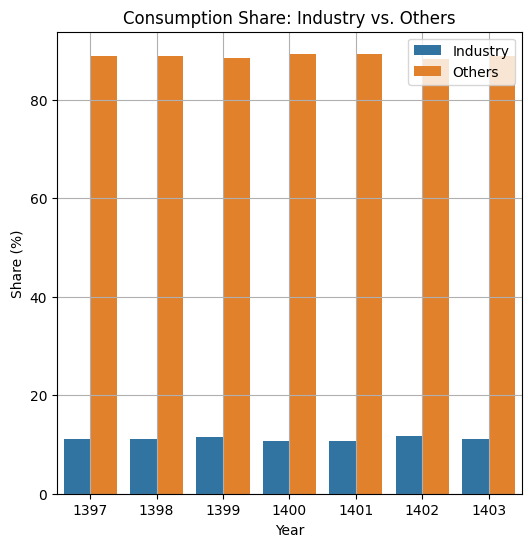

In [ ]:
# visualize
plt.figure(figsize=(6,6))
sns.barplot(data=df_melted, x='Year', y='Share', hue='Category')
plt.title('Consumption Share: Industry vs. Others')
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.grid(True)
plt.legend()
plt.show()

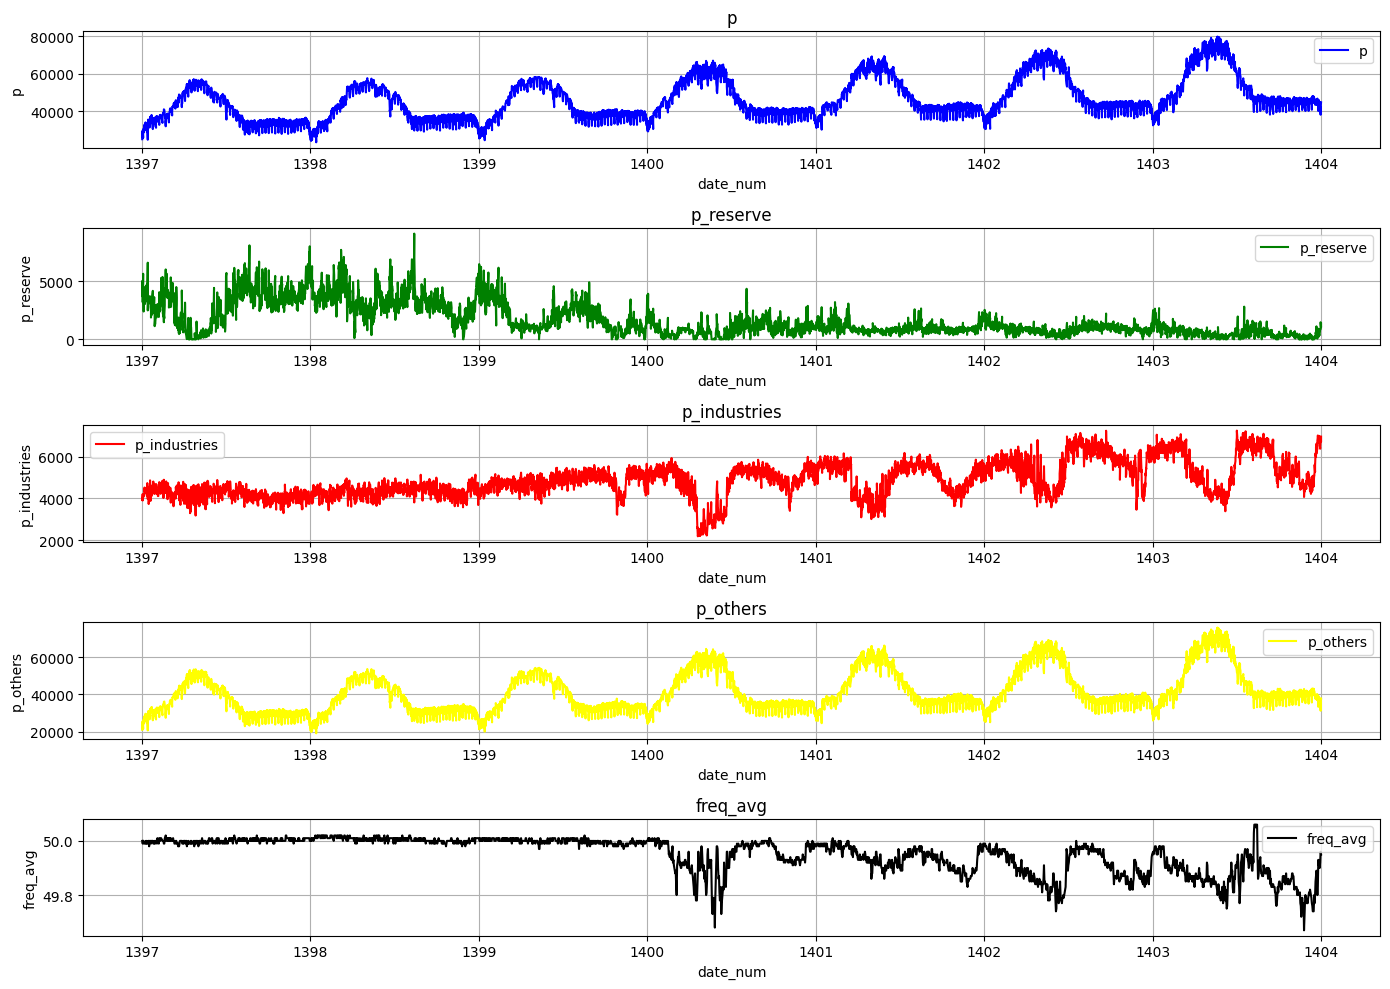

In [ ]:
# visualize 5 important parameters over all days of years
plt.figure(figsize=(14,10))

# plt.subplot(nrows, ncols, index)
# nrows: number of rows in the grid (fix)
# ncols: number of columns in the grid (fix)
# index: position of the plot (starts at 1)

# plt.plot(x, y, label='Line Label', color='blue', linestyle='-', marker='o')

# p
plt.subplot(5,1,1)
plt.plot(df['date_num'], df['p'], label = 'p', color = 'blue')
plt.title('p')
plt.xlabel('date_num')
plt.ylabel('p')
plt.grid(True)
plt.legend()

# p_reserve
plt.subplot(5,1,2)
plt.plot(df['date_num'], df['p_reserve'], label = 'p_reserve', color = 'green')
plt.title('p_reserve')
plt.xlabel('date_num')
plt.ylabel('p_reserve')
plt.grid(True)
plt.legend()

# p_industries
plt.subplot(5,1,3)
plt.plot(df['date_num'], df['p_industries'], label = 'p_industries', color = 'red')
plt.title('p_industries')
plt.xlabel('date_num')
plt.ylabel('p_industries')
plt.grid(True)
plt.legend()

# p_others
plt.subplot(5,1,4)
plt.plot(df['date_num'], df['p_others'], label = 'p_others', color = 'yellow')
plt.title('p_others')
plt.xlabel('date_num')
plt.ylabel('p_others')
plt.grid(True)
plt.legend()

# freq_avg
plt.subplot(5,1,5)
plt.plot(df['date_num'], df['freq_avg'], label = 'freq_avg', color = 'black')
plt.title('freq_avg')
plt.xlabel('date_num')
plt.ylabel('freq_avg')
plt.grid(True)
plt.legend()

# display all figures
plt.tight_layout()
plt.show()

# What is the amount of the power Consumption in holidays and non-holidays?
To answer, we first need filter the initial df based on working hour and working days.


In [ ]:
# filter df according to office hour
df['hour']= df['time'].str[:2].astype(int)
df_office_hours = df[df['hour'] <= 17]
df_office_hours.drop(columns=['r', 'time'], inplace=True)

<ipython-input-137-b45d264332cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_office_hours.drop(columns=['r', 'time'], inplace=True)


In [ ]:
d_calender = pd.read_excel('persianCalendar.xlsx')

In [ ]:
# merge two dataframe
DF = pd.merge(df_office_hours, d_calender, left_on='date', right_on='date_pr', how='left')
DF.dropna(subset = ['date_pr'], inplace=True)

In [ ]:
DF

,date,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,year,month,day,...,p_industries_share,p_others_share,p_renewable_share,hour,date_pr,weekday_fa,holiday_inCal,workingday_inCal,date_gr,weekday_en
1329,1400/09/30,39708.0,39201.0,768,4664,4436,49.98,1400,9,30,...,11.745744,88.254256,11.171552,17,1400/09/30,سه شنبه,0.0,1.0,2021-12-21,Tuesday
1330,1400/09/30,38134.0,37515.0,936,4871,4436,49.98,1400,9,30,...,12.773378,87.226622,11.632664,11,1400/09/30,سه شنبه,0.0,1.0,2021-12-21,Tuesday
1331,1400/09/29,41320.0,39798.0,586,5142,3433,49.98,1400,9,29,...,12.444337,87.555663,8.308325,17,1400/09/29,دوشنبه,0.0,1.0,2021-12-20,Monday
1332,1400/09/29,37943.0,38063.0,1150,4653,3433,49.98,1400,9,29,...,12.263132,87.736868,9.047782,12,1400/09/29,دوشنبه,0.0,1.0,2021-12-20,Monday
1333,1400/09/28,39026.0,32867.0,121,5464,1961,49.99,1400,9,28,...,14.000922,85.999078,5.024855,11,1400/09/28,یکشنبه,0.0,1.0,2021-12-19,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,1397/01/06,29820.0,24372.0,4013,4525,0,49.99,1397,1,6,...,15.174380,84.825620,0.000000,13,1397/01/06,دوشنبه,0.0,1.0,2018-03-26,Monday
2829,1397/01/05,28662.0,24671.0,4493,4215,0,49.99,1397,1,5,...,14.705882,85.294118,0.000000,13,1397/01/05,یکشنبه,0.0,1.0,2018-03-25,Sunday
2830,1397/01/03,25727.0,23705.0,5647,4138,0,50.00,1397,1,3,...,16.084269,83.915731,0.000000,13,1397/01/03,جمعه,1.0,0.0,2018-03-23,Friday
2831,1397/01/02,25686.0,22818.0,5064,4215,0,49.99,1397,1,2,...,16.409717,83.590283,0.000000,13,1397/01/02,پنجشنبه,1.0,0.0,2018-03-22,Thursday


In [ ]:
# adding half-holiday
DF.loc[(DF['weekday_en'] == 'Thursday') & (DF['holiday_inCal'] == 0) & (DF['workingday_inCal'] == 1), ['holiday_inCal', 'workingday_inCal']] = 0.5
DF.loc[(DF['m'] == 1) & (DF['d'] <= 13) & (DF['holiday_inCal'] == 0) & (DF['workingday_inCal'] == 1), ['holiday_inCal', 'workingday_inCal']] = 0.5